In [9]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-30.84695310794057 -138.821360082446
-37.696326295615016 -49.238434598352825
-47.14011268541249 160.8292975876024
29.850307024632713 -4.768209771589511
62.90683124361817 -135.72418365569757
59.97183929369797 10.433681033163822
61.57321060920816 114.64681564167097
78.58770802367019 -82.7635034003693
64.40576364146631 -126.79318796411007
25.520968226370215 -128.60761511511748
-87.48975340780366 -154.557727544868
25.66131563994331 35.717366768360336
-56.099156087315784 -128.05879437775403
-57.1505975268184 -117.87180669515709
-60.77294300656502 -137.59047845937434
-20.711848619601923 -138.6465344248453
-42.18865414064152 179.75560442321353
21.032514711246662 -153.67341812984455
79.96834616939495 -155.2745876034979
-16.1629619961991 17.35344781166725
-41.7369490597082 84.71792996208154
65.15131778828001 -159.8516745143309
21.11762085864575 33.1287237233403
25.58824228656391 -44.309970267608406
-79.55067748239007 -169.59349013312416
-78.447721996089 171.3974454655953
-7.868533841861364 -35.

65.05170644514573 -151.1541310793576
-64.38918363390289 -166.94672563789004
43.35723639292772 -14.620927171252276
13.156818279305426 -79.67023428440451
-43.41411212490306 167.99948111695124
30.804282381472376 20.74511977184946
-31.63436690349957 7.101846105743675
17.22760830827852 97.21309338664548
4.281968816506634 -14.128100460213147
1.175761375840736 -121.62643107548023
-7.733891547575325 139.79160196412158
54.21349171628546 43.393537712204534
44.63715696756557 112.66054816533108
-7.925133115422298 -124.33198704603268
68.51983109431683 162.24397224711157
30.32814294853165 107.0422520153291
15.992903122129945 25.895542913012974
37.14296880214394 -50.124097933894035
74.76399313820335 -145.762308681001
-12.715814897105219 -109.80887615438148
-38.887301331558945 12.829777616824487
0.6530364105849742 29.53689951529023
-5.6295026364182945 -22.26326919861529
83.35390534198427 -140.7295493313712
56.98782250092762 45.93606390742926
-85.72045584168492 2.019679992925006
-75.57100512658377 102.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bea5d4a9a7b7fef5b2d61a5aeef034c6


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

NameError: name 'city_url' is not defined

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pemangkat
Processing Record 2 of Set 1 | ust-omchug
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | san-pedro
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | nome
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | belozerskoye
Processing Record 12 of Set 1 | pasni
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | broome
Processing Record 20 of Set 1 | huarmey
Processing Record 21 of Set 1 | yulara
Processing Record 22 of Set 1 | carutapera
Processing Recor

Processing Record 41 of Set 4 | camapua
Processing Record 42 of Set 4 | huntsville
Processing Record 43 of Set 4 | wanning
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | nizwa
Processing Record 46 of Set 4 | xining
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | lata
Processing Record 49 of Set 4 | marawi
Processing Record 50 of Set 4 | uarini
Processing Record 1 of Set 5 | jiroft
City not found. Skipping...
Processing Record 2 of Set 5 | zaysan
Processing Record 3 of Set 5 | taoudenni
Processing Record 4 of Set 5 | tombouctou
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | asyut
Processing Record 7 of Set 5 | calamar
Processing Record 8 of Set 5 | farsund
Processing Record 9 of Set 5 | provideniya
Processing Record 10 of Set 5 | surt
Processing Record 11 of Set 5 | faanui
Processing Record 12 of Set 5 | ajdabiya
Processing Record 13 of Set 5 | laguna
Processing Record 14 of Set 5 | margate
Processing Record 1

Processing Record 31 of Set 8 | maniwaki
Processing Record 32 of Set 8 | aguimes
Processing Record 33 of Set 8 | sao raimundo das mangabeiras
Processing Record 34 of Set 8 | santa vitoria do palmar
Processing Record 35 of Set 8 | reykjavik
Processing Record 36 of Set 8 | lasa
Processing Record 37 of Set 8 | liwale
Processing Record 38 of Set 8 | ahipara
Processing Record 39 of Set 8 | dingle
Processing Record 40 of Set 8 | praia
Processing Record 41 of Set 8 | sibu
Processing Record 42 of Set 8 | nabire
Processing Record 43 of Set 8 | nokaneng
Processing Record 44 of Set 8 | klaksvik
Processing Record 45 of Set 8 | san quintin
Processing Record 46 of Set 8 | jibuti
Processing Record 47 of Set 8 | amderma
City not found. Skipping...
Processing Record 48 of Set 8 | mayo
Processing Record 49 of Set 8 | huron
Processing Record 50 of Set 8 | quthing
Processing Record 1 of Set 9 | montalban
Processing Record 2 of Set 9 | inderborskiy
City not found. Skipping...
Processing Record 3 of Set 9 |

Processing Record 21 of Set 12 | terra santa
Processing Record 22 of Set 12 | mehamn
Processing Record 23 of Set 12 | san isidro
Processing Record 24 of Set 12 | sorong
Processing Record 25 of Set 12 | sioux lookout
Processing Record 26 of Set 12 | yinchuan
Processing Record 27 of Set 12 | mizpe ramon
City not found. Skipping...
Processing Record 28 of Set 12 | forecariah
Processing Record 29 of Set 12 | grand centre
City not found. Skipping...
Processing Record 30 of Set 12 | penzance
Processing Record 31 of Set 12 | kailua
Processing Record 32 of Set 12 | bonthe
Processing Record 33 of Set 12 | hafizabad
Processing Record 34 of Set 12 | challans
Processing Record 35 of Set 12 | yar-sale
Processing Record 36 of Set 12 | yaan
Processing Record 37 of Set 12 | vilhena
Processing Record 38 of Set 12 | katherine
Processing Record 39 of Set 12 | flin flon
-----------------------------
Data Retrieval Complete      
-----------------------------


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pemangkat,1.1667,108.9667,81.75,73,4,1.57,ID,2022-05-31 16:52:19
1,Ust-Omchug,61.1500,149.6333,37.60,98,100,5.84,RU,2022-05-31 16:52:19
2,Bluff,-46.6000,168.3333,50.81,82,100,8.48,NZ,2022-05-31 16:50:29
3,San-Pedro,4.7485,-6.6363,81.23,74,28,7.90,CI,2022-05-31 16:52:19
4,Avarua,-21.2078,-159.7750,71.65,83,33,2.30,CK,2022-05-31 16:50:18
5,Nome,64.5011,-165.4064,52.16,66,0,0.00,US,2022-05-31 16:52:20
6,Hermanus,-34.4187,19.2345,52.81,69,53,13.20,ZA,2022-05-31 16:52:20
7,Puerto Ayora,-0.7393,-90.3518,80.56,81,98,13.20,EC,2022-05-31 16:50:34
8,Busselton,-33.6500,115.3333,52.02,78,51,3.80,AU,2022-05-31 16:52:21
9,Punta Arenas,-53.1500,-70.9167,42.91,70,0,9.22,CL,2022-05-31 16:50:22


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng",  "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pemangkat,ID,2022-05-31 16:52:19,1.1667,108.9667,81.75,73,4,1.57
1,Ust-Omchug,RU,2022-05-31 16:52:19,61.1500,149.6333,37.60,98,100,5.84
2,Bluff,NZ,2022-05-31 16:50:29,-46.6000,168.3333,50.81,82,100,8.48
3,San-Pedro,CI,2022-05-31 16:52:19,4.7485,-6.6363,81.23,74,28,7.90
4,Avarua,CK,2022-05-31 16:50:18,-21.2078,-159.7750,71.65,83,33,2.30
5,Nome,US,2022-05-31 16:52:20,64.5011,-165.4064,52.16,66,0,0.00
6,Hermanus,ZA,2022-05-31 16:52:20,-34.4187,19.2345,52.81,69,53,13.20
7,Puerto Ayora,EC,2022-05-31 16:50:34,-0.7393,-90.3518,80.56,81,98,13.20
8,Busselton,AU,2022-05-31 16:52:21,-33.6500,115.3333,52.02,78,51,3.80
9,Punta Arenas,CL,2022-05-31 16:50:22,-53.1500,-70.9167,42.91,70,0,9.22


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

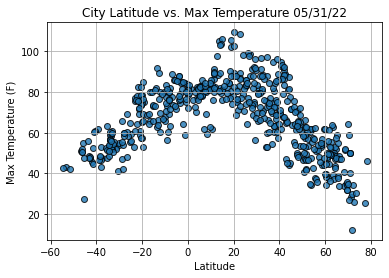

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

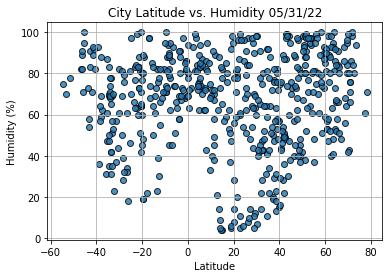

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

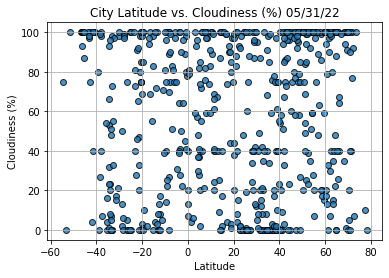

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

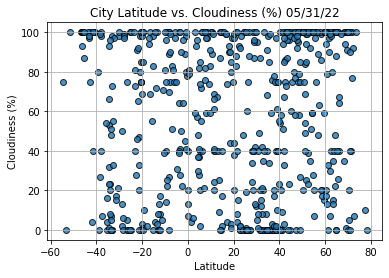

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

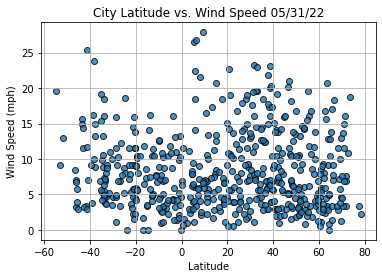

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pemangkat,ID,2022-05-31 16:52:19,1.1667,108.9667,81.75,73,4,1.57
1,Ust-Omchug,RU,2022-05-31 16:52:19,61.1500,149.6333,37.60,98,100,5.84
3,San-Pedro,CI,2022-05-31 16:52:19,4.7485,-6.6363,81.23,74,28,7.90
5,Nome,US,2022-05-31 16:52:20,64.5011,-165.4064,52.16,66,0,0.00
10,Belozerskoye,RU,2022-05-31 16:52:21,55.8214,65.5842,51.10,75,75,11.88


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

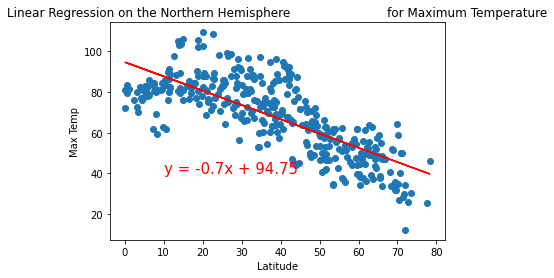

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

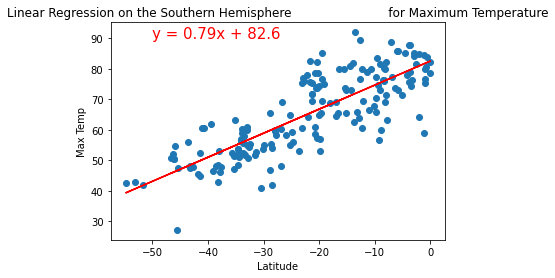

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

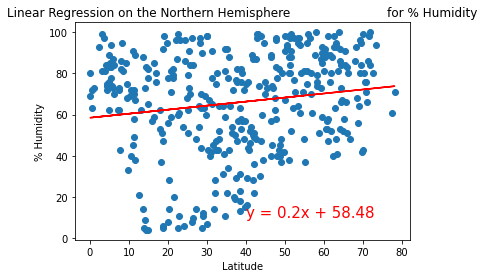

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


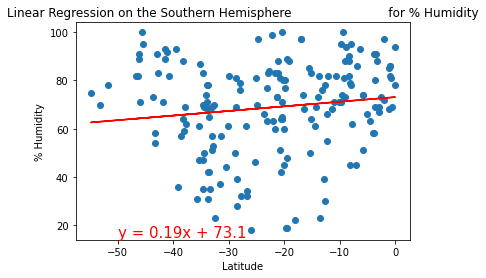

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

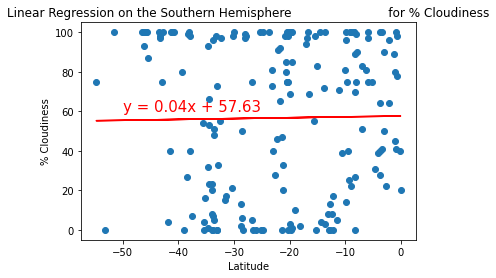

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

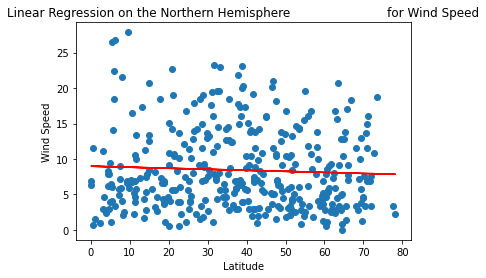

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

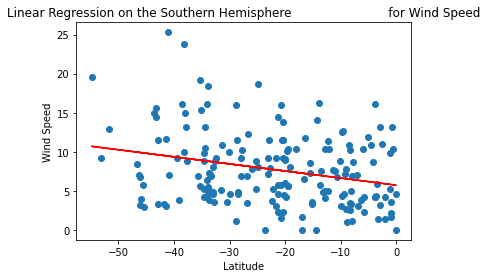

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [44]:
import scipy.stats

In [45]:
result = scipy.stats.linregress(x_values, y_values)
result.rvalue

-0.2655960160942841